<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Predicting "Greenness" of Content

_Authors: Joseph Nelson (DC), Kiefer Katovich (SF)_

---


This data set comes from [StumbleUpon](https://www.stumbleupon.com/), a web page recommender, and was made available [here](https://www.kaggle.com/c/stumbleupon/download/train.tsv).

Below is a description of the columns:

FieldName|Type|Description
---------|----|-----------
url|string|URL of the web page to be classified
urlid|integer| StumbleUpon's unique identifier for each URL
boilerplate|json|Boilerplate text
alchemy_category|string|Alchemy category (per the publicly available AlchemyAPI found at www.alchemyapi.com)
alchemy_category_score|double|Alchemy category score (per the publicly available AlchemyAPI found at www.alchemyapi.com)
avglinksize| double|Average number of words in each link
commonLinkRatio_1|double|Number of links sharing at least one word with one other link/number of links
commonLinkRatio_2|double|Number of links sharing at least one word with two other links/number of links
commonLinkRatio_3|double|Number of links sharing at least one word with three other links/number of links
commonLinkRatio_4|double|Number of links sharing at least one word with four other links/number of links
compression_ratio|double|Compression achieved on this page via gzip (measure of redundancy).
embed_ratio|double|Count of the number of <embed> usages
frameBased|integer (0 or 1)|A page is frame based (1) if it has no body markup but has a frameset markup
frameTagRatio|double|Ratio of the iframe markups over the total number of markups
hasDomainLink|integer (0 or 1)|True (1) if it contains a URL with a domain
html_ratio|double|Ratio of tags vs. text in the page
image_ratio|double|Ratio of <img> tags vs. text in the page
is_news|integer (0 or 1) | True (1) if StumbleUpon's news classifier determines that this web page is news
lengthyLinkDomain| integer (0 or 1)|True (1) if at least three <a>'s text contain more than 30 alphanumeric characters
linkwordscore|double|Percentage of words on the page that are hyperlinks
news_front_page| integer (0 or 1)|True (1) if StumbleUpon's news classifier determines that this web page is front-page news
non_markup_alphanum_characters|integer| Page's text's number of alphanumeric characters
numberOfLinks|integer Number of <a>| Markups
numwords_in_url| double|Number of words in URL
parametrizedLinkRatio|double|A link is parametrized if it's URL contains parameters or has an attached onclick event
spelling_errors_ratio|double|Ratio of words not found in wiki (considered to be a spelling mistake)
label|integer (0 or 1)|User-determined label. Either evergreen (1) or non-evergreen (0); available for train.tsv only

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
%matplotlib inline

# Set max printout options for Pandas.
pd.options.display.max_columns = 50
pd.options.display.max_colwidth = 300

### 1) Load the data.
- Note that it's a `.tsv` file and has a tab separator instead of comma.
- Clean the `is_news` column.
- Create two new columns, `title` and `body`, from the `boilerplate` column.

> **Note:** The `boilerplate` column is in JSON dictionary format. You can use the `json.loads()` function from the `json` module to convert this into a Python dictionary.

In [45]:
evergreen_tsv = '../datasets/evergreen_sites.tsv'

In [46]:
df = pd.read_csv(evergreen_tsv, delimiter='\t')
df.sample(5)

,url,urlid,boilerplate,alchemy_category,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,framebased,frameTagRatio,hasDomainLink,html_ratio,image_ratio,is_news,lengthyLinkDomain,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label
6509,http://www.scarves.net/blog/12-more-ways-to-tie-a-scarf,2225,"{""url"":""scarves blog 12 more ways to tie a scarf"",""title"":""12 More Ways to Tie A Scarf For Every Season "",""body"":""Remember this graphic on how to tie scarves It s back Now with a brand new batch of creative ways to tie your favorite neck embellishment this easy breezy graphic is here to rescue s...",arts_entertainment,0.773994,1.927536,0.507042,0.253521,0.056338,0.028169,0.375385,0.0,0,0.037534,0,0.262208,0.035294,1,0,17,0,2872,71,5,0.084507,0.124272,1
5354,http://www.fishtec.co.uk/blog/fly-fishing-downton-abbey,5395,"{""url"":""fishtec co uk blog fly fishing downton abbey"",""title"":""Fly fishing at Downton Abbey "",""body"":""Ever dreamt of casting your fly rod with the Earl of Grantham or sharing cucumber sandwiches with Lady Mary by the riverbank The TV series Downton Abbey depicts the aristocracy and their servant...",recreation,0.911915,4.677843,0.927746,0.830925,0.601156,0.414740,0.478495,0.0,0,0.012686,0,0.159712,0.014894,1,1,74,0,5109,692,6,0.001445,0.092613,0
777,http://beenidrew.com/i-am-sasha-fierce/,8011,"{""title"":""Beyonce I Am Sasha Fierce "",""body"":""I Am Sasha Fierce is the third studio album by American R B recording artist Beyonc\u00e9 It was released on November 18 2008 by Columbia Records It is classified as a dual disc album the first disc I Am incorporates slow and mid tempo R B ballads an...",?,?,1.285714,0.650943,0.245283,0.000000,0.000000,0.566489,0.0,0,0.063444,0,0.220529,0.102041,1,0,33,0,1270,106,2,0.047170,0.048128,0
4675,http://www.theburghbaby.com/burghbaby/campfire-baked-apples.html,661,"{""title"":""Campfire Baked Apples Home burgh baby campfire baked apples - home - burgh baby"",""body"":""It s all Maggie s fault On my post about these She mentioned in the comments that baked apples are really good when thrown on a fire Which WTH Why didn t I think of that I make baked apples fairly ...",recreation,0.428649,1.187500,0.126984,0.063492,0.000000,0.000000,0.535549,0.0,0,0.077568,0,0.225668,0.110577,1,0,12,0,1926,63,5,0.063492,0.126761,1
235,http://www.geekosystem.com/inglip/,1761,"{""title"":""Inglip Explained Geekosystem praise lord inglip, from whom all blessings flow"",""body"":""Come one come all and listen to the revelation of our Lord Inglip Come receive his wisdom delivered to us through the holy mouthpiece of reCAPTCHA Examine the Inglipnomicon and be enlightened Oh you ...",recreation,0.114894,1.957746,0.514019,0.070093,0.032710,0.023364,0.443843,-1.0,0,0.049605,0,0.216563,0.169192,1,1,27,0,5086,214,1,0.308411,0.171355,0


In [47]:
df['is_news'].value_counts()

1    4552
?    2843
Name: is_news, dtype: int64

In [48]:
df['is_news'] = df['is_news'].apply(lambda x: int(str(x).replace('?','0')))

In [49]:
df['title'] = df['boilerplate'].map(lambda x: json.loads(x).get('title', ''))
df['body'] = df['boilerplate'].map(lambda x: json.loads(x).get('body', ''))

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7395 entries, 0 to 7394
Data columns (total 29 columns):
url                               7395 non-null object
urlid                             7395 non-null int64
boilerplate                       7395 non-null object
alchemy_category                  7395 non-null object
alchemy_category_score            7395 non-null object
avglinksize                       7395 non-null float64
commonlinkratio_1                 7395 non-null float64
commonlinkratio_2                 7395 non-null float64
commonlinkratio_3                 7395 non-null float64
commonlinkratio_4                 7395 non-null float64
compression_ratio                 7395 non-null float64
embed_ratio                       7395 non-null float64
framebased                        7395 non-null int64
frameTagRatio                     7395 non-null float64
hasDomainLink                     7395 non-null int64
html_ratio                        7395 non-null float64
image_r

In [51]:
df.shape

(7395, 29)

### 2) What are "evergreen" sites?
- These are websites that have content that's always relevant — like recipes or reviews — as opposed to current events.
- "Evergreen" is stored as a binary indicator in the `label` column.
- Let's look at some examples:

In [52]:
df['label'].value_counts()

1    3796
0    3599
Name: label, dtype: int64

In [53]:
df[df['label']==1].sample(10)['url'].apply(lambda x: x.replace("http://",'').split('/')[0])

6613               shine.yahoo.com
5204      vanillaicing.typepad.com
2122              frugalkiwi.co.nz
6633    unegaminedanslacuisine.com
6856        www.andreasrecipes.com
2753               17andbaking.com
2860                  usafilm.info
1187          www.sciencedaily.com
1727          www.villagevoice.com
3699         www.alithelazydog.com
Name: url, dtype: object

In [54]:
df[df['label']==0].sample(10)['url'].apply(lambda x: x.replace("http://",'').split('/')[0])

6502          www.360bilder.de
2914       www.sportaphile.com
7289           www.youtube.com
5417        www.tensionnot.com
1635              www.wimp.com
6608           www.cbsnews.com
3321        bleacherreport.com
3339              www.elle.com
6487    www.insidershealth.com
1340         www.newyorker.com
Name: url, dtype: object

### 3) Does being a news site affect greenness?

**3.A Investigate with plots/EDA.**

In [55]:
import statsmodels.formula.api as sm

In [56]:
df['is_news'].value_counts()

1    4552
0    2843
Name: is_news, dtype: int64

In [57]:
df.groupby('is_news').agg([np.mean,np.std, np.count_nonzero])[['label']]

label                        
             mean       std count_nonzero
is_news                                  
0        0.507562  0.500031          1443
1        0.516916  0.499769          2353

In [58]:
df.groupby(['is_news','label']).size().unstack()

label,0,1
is_news,,
0,1400,1443
1,2199,2353


In [59]:
from scipy.stats import chi2_contingency

chi2, p, dof, ex = chi2_contingency(df.groupby(['is_news','label']).size().unstack().values)
print(chi2,p)

0.5759488221401785 0.44790464888828363


**3.B) Test the hypothesis with a logistic regression using statsmodels.**

> **Hint:** The `sm.logit` function from `statsmodels.formula.api` will perform a logistic regression using a formula string.

In [60]:
import statsmodels.formula.api as sm
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [61]:
sm.logit(formula='label ~ is_news',data=df).fit().summary()

Optimization terminated successfully.
         Current function value: 0.692751
         Iterations 3


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  label   No. Observations:                 7395
Model:                          Logit   Df Residuals:                     7393
Method:                           MLE   Df Model:                            1
Date:                Tue, 02 Oct 2018   Pseudo R-squ.:               5.980e-05
Time:                        10:23:15   Log-Likelihood:                -5122.9
converged:                       True   LL-Null:                       -5123.2
                                        LLR p-value:                    0.4337
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0303      0.038      0.806      0.420      -0.043       0.104
is_news        0.0374      0.048      0.783      0.434      -0.056       0.131
==============================================================================
"""

**3.C) Interpret the results of your model.**

Both p values (for intercept and is_news) are >0.05 so we cannot say is_news is a good predictor of our target variable

### 4) Does the website category affect greenness?

**4.A) Investigate with plots/EDA.**

In [62]:
df['alchemy_category'].value_counts()

?                     2342
recreation            1229
arts_entertainment     941
business               880
health                 506
sports                 380
culture_politics       343
computer_internet      296
science_technology     289
gaming                  76
religion                72
law_crime               31
unknown                  6
weather                  4
Name: alchemy_category, dtype: int64

In [63]:
df['alchemy_category'] = df['alchemy_category'].apply(lambda x: 'unknown' if x=='?' else x)

In [64]:
df['alchemy_category'].value_counts()

unknown               2348
recreation            1229
arts_entertainment     941
business               880
health                 506
sports                 380
culture_politics       343
computer_internet      296
science_technology     289
gaming                  76
religion                72
law_crime               31
weather                  4
Name: alchemy_category, dtype: int64

In [65]:
df.groupby('alchemy_category').agg([np.mean,np.std, 'size'])[['label']]

label                
                        mean       std  size
alchemy_category                            
arts_entertainment  0.371945  0.483581   941
business            0.711364  0.453386   880
computer_internet   0.246622  0.431775   296
culture_politics    0.457726  0.498938   343
gaming              0.368421  0.485582    76
health              0.573123  0.495114   506
law_crime           0.419355  0.501610    31
recreation          0.684296  0.464985  1229
religion            0.416667  0.496466    72
science_technology  0.456747  0.498990   289
sports              0.205263  0.404426   380
unknown             0.501704  0.500104  2348
weather             0.000000  0.000000     4

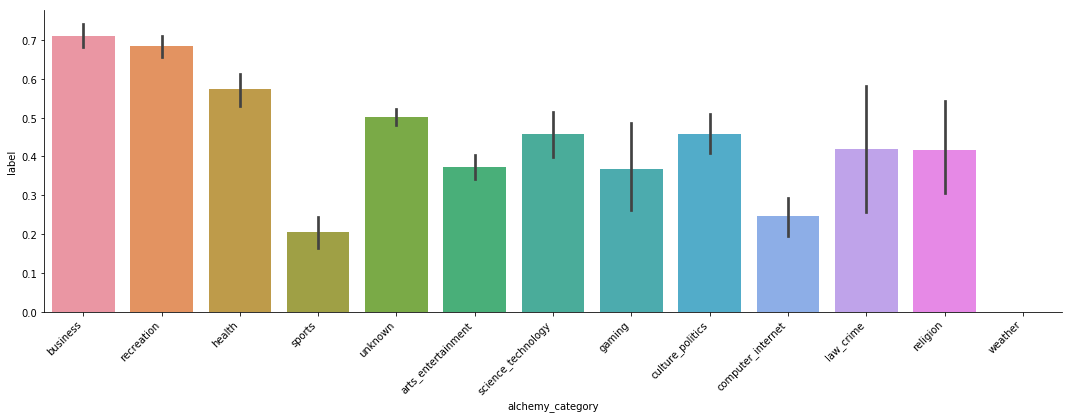

In [66]:
sns.catplot(x='alchemy_category', y='label', 
               data=df, kind='bar', aspect=3).set_xticklabels(rotation=45, horizontalalignment='right')

In [67]:
df.groupby(['alchemy_category','label']).size().unstack().fillna(0)

label,0,1
alchemy_category,,
arts_entertainment,591.0,350.0
business,254.0,626.0
computer_internet,223.0,73.0
culture_politics,186.0,157.0
gaming,48.0,28.0
health,216.0,290.0
law_crime,18.0,13.0
recreation,388.0,841.0
religion,42.0,30.0


In [68]:
chi2, p, dof, ex = chi2_contingency(df.groupby(['alchemy_category','label']).size().unstack().fillna(0).values.T)
print(chi2,p)

616.728328724281 2.833736417788549e-124


**4.B) Test the hypothesis with a logistic regression.**

In [69]:
#NOTE: fit(maxiter=500,method='bfgs')

sm.logit(formula="label ~ C(alchemy_category, Treatment(reference='unknown'))",data=df).fit(maxiter=500,method='bfgs').summary()

Optimization terminated successfully.
         Current function value: 0.649499
         Iterations: 113
         Function evaluations: 115
         Gradient evaluations: 115


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  label   No. Observations:                 7395
Model:                          Logit   Df Residuals:                     7382
Method:                           MLE   Df Model:                           12
Date:                Tue, 02 Oct 2018   Pseudo R-squ.:                 0.06249
Time:                        10:23:17   Log-Likelihood:                -4803.0
converged:                       True   LL-Null:                       -5123.2
                                        LLR p-value:                2.585e-129
=============================================================================================================================================
                                                                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                     0.0067      0.041      0.163      0.871      -0.074       0.088
C(alchemy_category, Treatment(reference='unknown'))[T.arts_entertainment]    -0.5306      0.079     -6.710      0.000      -0.686      -0.376
C(alchemy_category, Treatment(reference='unknown'))[T.business]               0.8953      0.085     10.524      0.000       0.729       1.062
C(alchemy_category, Treatment(reference='unknown'))[T.computer_internet]     -1.1244      0.141     -7.972      0.000      -1.401      -0.848
C(alchemy_category, Treatment(reference='unknown'))[T.culture_politics]      -0.1759      0.116     -1.517      0.129      -0.403       0.051
C(alchemy_category, Treatment(reference='unknown'))[T.gaming]                -0.5464      0.241     -2.264      0.024      -1.020      -0.073
C(alchemy_category, Treatment(reference='unknown'))[T.health]                 0.2880      0.099      2.911      0.004       0.094       0.482
C(alchemy_category, Treatment(reference='unknown'))[T.law_crime]             -0.3298      0.366     -0.901      0.368      -1.048       0.388
C(alchemy_category, Treatment(reference='unknown'))[T.recreation]             0.7669      0.074     10.369      0.000       0.622       0.912
C(alchemy_category, Treatment(reference='unknown'))[T.religion]              -0.3428      0.243     -1.413      0.158      -0.818       0.133
C(alchemy_category, Treatment(reference='unknown'))[T.science_technology]    -0.1803      0.125     -1.441      0.149      -0.426       0.065
C(alchemy_category, Treatment(reference='unknown'))[T.sports]                -1.3596      0.134    -10.183      0.000      -1.621      -1.098
C(alchemy_category, Treatment(reference='unknown'))[T.weather]              -11.8128    183.079     -0.065      0.949    -370.641     347.015
=============================================================================================================================================
"""

**4.C Interpret the model results.**

Many coefficient are statistically significant.

### 5) Does the image ratio affect greenness?

**5.A) Investigate with plots/EDA.**

In [70]:
df['image_ratio'].describe()

count    7395.000000
mean        0.275709
std         1.919320
min        -1.000000
25%         0.025900
50%         0.083051
75%         0.236700
max       113.333333
Name: image_ratio, dtype: float64

In [71]:
df['image_ratio'].value_counts().head(20)

-1.000000    690
 0.000000     40
 0.724138     35
 0.333333     23
 0.250000     19
 1.000000     18
 0.500000     14
 0.062500     13
 0.230769     11
 0.083333     10
 0.153846     10
 0.166667     10
 0.018868     10
 0.038462      9
 0.125000      9
 0.142857      9
 0.222222      9
 0.023256      8
 0.041667      8
 0.055556      8
Name: image_ratio, dtype: int64

> **NOTE**  
> There are a lot of -1 and 0!

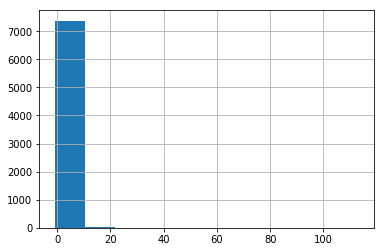

In [72]:
df['image_ratio'].hist(bins=10)

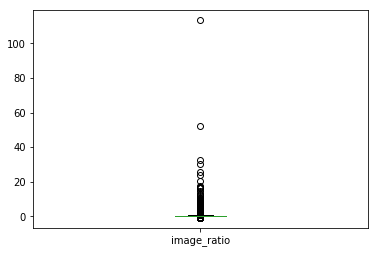

In [73]:
df['image_ratio'].plot(kind='box')

**Let's consider only values>0**

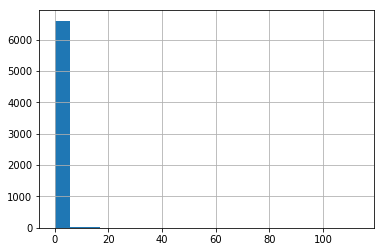

In [74]:
df[df['image_ratio']>0]['image_ratio'].hist(bins=20)

Let's use a log tranformation

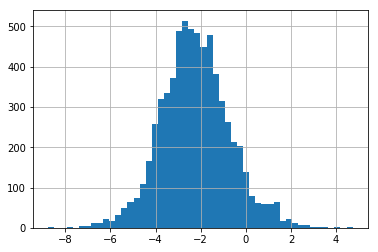

In [75]:
df[df['image_ratio']>0]['image_ratio'].apply(np.log).hist(bins=50)

> **NOTE**  
> The distribution is log-normal!

**5.B) Test the hypothesis using a logistic regression.**

> **Note**: It's worth thinking about how to best represent this variable. It may not be wise to input the image ratio as is.

In [76]:
sm.logit(formula="label ~ image_ratio",data=df).fit(maxiter=500).summary()

Optimization terminated successfully.
         Current function value: 0.692631
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  label   No. Observations:                 7395
Model:                          Logit   Df Residuals:                     7393
Method:                           MLE   Df Model:                            1
Date:                Tue, 02 Oct 2018   Pseudo R-squ.:               0.0002325
Time:                        10:23:18   Log-Likelihood:                -5122.0
converged:                       True   LL-Null:                       -5123.2
                                        LLR p-value:                    0.1228
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0590      0.024      2.499      0.012       0.013       0.105
image_ratio    -0.0210      0.015     -1.400      0.161      -0.051       0.008
===============================================================================
"""

In [77]:
sm.logit(formula="label ~ np.log(image_ratio+2)",data=df).fit(maxiter=500).summary()

Optimization terminated successfully.
         Current function value: 0.692767
         Iterations 3


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  label   No. Observations:                 7395
Model:                          Logit   Df Residuals:                     7393
Method:                           MLE   Df Model:                            1
Date:                Tue, 02 Oct 2018   Pseudo R-squ.:               3.643e-05
Time:                        10:23:18   Log-Likelihood:                -5123.0
converged:                       True   LL-Null:                       -5123.2
                                        LLR p-value:                    0.5412
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.0848      0.057      1.499      0.134      -0.026       0.196
np.log(image_ratio + 2)    -0.0421      0.069     -0.611      0.541      -0.177       0.093
===========================================================================================
"""

#### Let's use another column to keep track of the 0s and -1s and use the median

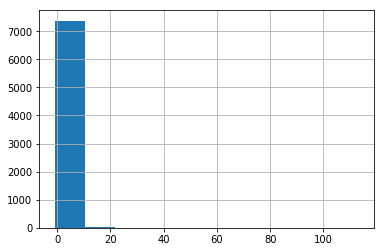

In [85]:
df['image_ratio'].hist()

In [87]:
#values between 0 and 1
len(df[(df['image_ratio']>=0) & (df['image_ratio']<=1)]) / len(df)

0.8455713319810683

In [88]:
# values smaller than 0
len(df[(df['image_ratio']<0)]) / len(df)

0.09330628803245436

In [89]:
# values greater than 1
len(df[(df['image_ratio']>1)]) / len(df)

0.06112237998647735

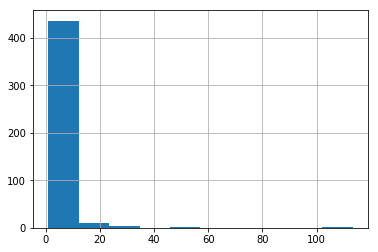

In [94]:
df[(df['image_ratio']>1)]['image_ratio'].hist()

In [96]:
# if the value is < 0, use the median
image_ratio_median = np.median(df['image_ratio'])
print(image_ratio_median)
df['image_ratio_new'] = df['image_ratio'].apply(lambda x: image_ratio_median if x<0 else x)

0.083050847


In [99]:
# After the previous substitution we cannot differenciate, in image_ratio_new,
# values that were previously<0.
# To keep track of those values we use a new 
# variable, so the model can calculate a special coefficient
# to keep track of those values.
df['image_ratio_lt0'] = (df['image_ratio'] > 0).astype(int)

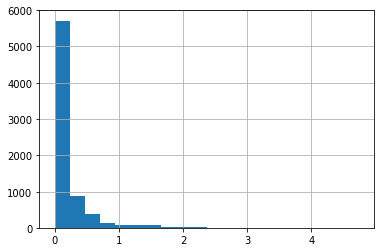

In [100]:
df['image_ratio_new'].apply(lambda x: np.log(x+1)).hist(bins=20)

In [101]:
sm.logit(formula="label ~ np.log(image_ratio_new + 1) + image_ratio_lt0",data=df).fit(maxiter=500).summary()

Optimization terminated successfully.
         Current function value: 0.688462
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  label   No. Observations:                 7395
Model:                          Logit   Df Residuals:                     7392
Method:                           MLE   Df Model:                            2
Date:                Tue, 02 Oct 2018   Pseudo R-squ.:                0.006251
Time:                        10:31:49   Log-Likelihood:                -5091.2
converged:                       True   LL-Null:                       -5123.2
                                        LLR p-value:                 1.235e-14
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -0.2590      0.075     -3.453      0.001      -0.406      -0.112
np.log(image_ratio_new + 1)    -0.4439      0.072     -6.159      0.000      -0.585      -0.303
image_ratio_lt0                 0.4483      0.079      5.645      0.000       0.293       0.604
===============================================================================================
"""

**5.C) Interpret the model.**

After using the two transformations:  
1. the new column for the -1s and 0s  
2. substitute the values -1 and 0 with the median of the distribution  

The model seems ok!

### 6) Fit a logistic regression with multiple predictors.
- The choice of predictors is up to you. Test features you think may be valuable to predicting evergreen status.
- Perform any EDA you may need.
- Interpret the coefficients of the model.

> **Tip:** [This PDF](https://www.unm.edu/~schrader/biostat/bio2/Spr06/lec11.pdf) is useful for gaining an overview of interpreting logistic regression coefficients.

In [ ]:
# a